# Ejercicio 3. Entrelazamiento, CHSH y Teleportación

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from grader import *
language(True)

Autor de este ejercicio: Juan Santos Suárez

Contacto: juan.santos.suarez@rai.usc.es

<div class="alert alert-block alert-success">
    
**Léeme**
    
En esta parte del *challenge* vamos a explorar algunos ejercicios que tienen que ver con el entrelazamiento cuántico. Esencialmente la primera parte del ejercicio se basa en la preparación de diferentes estados y después habrá preguntas sobre ellos.
    
Esta estructura se parece a cómo se suelen abordar los problemas en física, primero se deben de fabricar unas condiciones iniciales y después se pueden hacer experimentos o cálculos a partir de ellas. En este caso, los estados que vamos a crear son bastante sencillos, pero no se debe olvidar que, en general, la preparación de estados es un problema realmente complicado.
    
En total hay 14 preguntas (marcadas en verde) en este Jupyter notebook. Hazlas en orden y no te preocupes si no te da tiempo a acabarlas todas. En caso de que te atasques y no seas capaz de resolver algún ejercicio, levanta la mano y trataremos de darte pistas que te permitan continuar. 
    
</div>

## Preparación de estados

Durante la clase de esta mañana sobre Teleportación Cuántica hemos utilizado el estado de Bell
$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right),$$
que preparamos utilizando el circuito


In [ ]:
phi_plus = QuantumCircuit(2)
phi_plus.h(0)
phi_plus.cnot(0, 1)
phi_plus.draw('mpl')

In [ ]:
# Simulamos para ver su resultado
backend = Aer.get_backend('statevector_simulator')
result = execute(phi_plus, backend).result().get_statevector()
array_to_latex(result)

Sin embargo, no hemos visto cómo son los circuitos que preparan el resto de estados de Bell.

$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right),$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right),$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right).$$

Como calentamiento, crea los circuitos que preparan estos estados.

<div class="alert alert-block alert-success">

**Q3.1 Crea un circuito que prepare el estado $|\phi^-\rangle$ (1 pt)**  

Puede ser útil recordar las puertas que se han utilizado en el resto de ejercicios, en particular
    
$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$
    
</div>

In [ ]:
phi_minus = QuantumCircuit(2)

##### ==================================
# Escribe tu solución aquí.


##### ==================================

phi_minus.draw('mpl')

In [ ]:
# Esta celda te dirá si lo que has hecho da el resultado correcto.
# Tómalo como un indicador, los tests que hace no consideran todas las opciones posibles.
# Si crees que tu respuesta es (in)correcta y el grader dice algo diferente, simplemente pregúntame.
# No intentes hacer trampas modificando el código del corrector :)

ex1_grader(phi_minus)

<div class="alert alert-block alert-success">
    
**Q3.2 Crea un circuito que prepare el estado $|\psi^+\rangle$ (1 pt)**  
    
</div>

In [ ]:
psi_plus = QuantumCircuit(2)

##### ==================================
# Escribe tu solución aquí.



##### ==================================

psi_plus.draw('mpl')

In [ ]:
ex2_grader(psi_plus)

<div class="alert alert-block alert-success">
    
**Q3.3 Crea un circuito que prepare el estado $|\psi^-\rangle$ (1 pt)**  
    
</div>

In [ ]:
psi_minus = QuantumCircuit(2)

##### ==================================
# Escribe tu solución aquí.




##### ==================================

psi_minus.draw('mpl')

In [ ]:
ex3_grader(psi_minus)

Este tipo de estado maximalmente entrelazados pueden ser generalizados a sistemas con $n$ cúbits, tomando el nombre de estados de Greenberger–Horne–Zeilinger (GHZ).
$$|\text{GHZ}\rangle_n = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n}\right).$$

Naturalmente, esta familia de estados también se usan en algunos protocolos de telerpotación como el [quantum Byzantine agreement](https://en.wikipedia.org/wiki/Quantum_Byzantine_agreement). A pesar de que aquí utilizemos el subíndice $n$, lo más normal es no utilizarlo y simplemente asumir que $\text{GHZ}$ se refiere a $n=3$

<div class="alert alert-block alert-success">

**Q3.4 Crea un circuito que prepare el estado $|\text{GHZ}\rangle_3$ (1 pt)**

$$|\text{GHZ}\rangle_3 = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle\right)$$

In [ ]:
GHZ = QuantumCircuit(3)

##### ==================================
# Escribe tu solución aquí.



##### ==================================

GHZ.draw('mpl')

In [ ]:
ex4_grader(GHZ)

Por supuesto, los estados entrelazados pueden tomar formas bastante diferentes. Por ejemplo, considera el estado de $3$ cúbits que tiene un número par de unos
$$|\text{Even}\rangle = c_{00}|000\rangle + c_{01}|101\rangle + c_{10}|110\rangle + c_{11}|011\rangle.$$

Si ignoramos el primer cúbit, el estado en los otros dos podría estar no entrelazado dependiendo de los valores de $c_{ij}$. En particular, si consideramos $c_{ij}=\frac{1}{2}$, tendremos una superposición uniforme en los dos últimos cúbits
$$|++\rangle = \frac{1}{2} \left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right),$$

esto es, un estado producto $|++\rangle = \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)\otimes \left(\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\right)$. Pero si añadimos el primer cúbit que elige la paridad,
$$|\text{Even}\rangle_{++} = \frac{1}{2}\left(|000\rangle + |101\rangle + |110\rangle + |011\rangle\right),$$

esta estructura de estado producto se pierde. Adicionalmente, si se midiese alguno de los cúbits, está garantizado que el otro par estará en el estado $|\phi^+\rangle$ si se mide $0$ o $|\psi^+\rangle$ si se mide $1$.

A pesar de que esto pueda parecer medio trivial, puede ser importante para sistemas físicos reales. Dos buenos ejemplos de lo útil que puede ser este tema de la paridad son el hecho de que los estados fundamentales de ciertos sistemas puedan tener fijada su paridad o que esto se tenga en cuanta a la hora de implementar operadores de evolución temporal $e^{-iHt}$ (Nielsen and Chuang section 4.7.3)

<div class="alert alert-block alert-success">

**Q3.5 Crea un circuito que prepare la superposición uniforme de estados pares. (1 pt)**
    
$$|\text{Even}\rangle_{++} = \frac{1}{2}\left(|000\rangle + |101\rangle + |110\rangle + |011\rangle\right).$$
    
</div>

In [ ]:
Even = QuantumCircuit(3)

##### ==================================
# Escribe tu solución aquí.




##### ==================================

Even.draw('mpl')

In [ ]:
ex5_grader(Even)

<div class="alert alert-block alert-success">

**Q3.6 Crea un circuito que prepare la superposición uniforme de estados impares (1 pt)**
    
$$|\text{Odd}\rangle_{++} = \frac{1}{2}\left(|100\rangle + |001\rangle + |010\rangle + |111\rangle\right).$$
    
</div>

In [ ]:
Odd = QuantumCircuit(3)

##### ==================================
# Escribe tu solución aquí.




##### ==================================

Odd.draw('mpl')

In [ ]:
ex6_grader(Odd)

# Desigualdad CHSH 

Hemos discutido algunos aspectos sobre como funciona el entrelazamiento y lo antiintuitivo que puede llegar a ser. Como vimos durante la clase, en los principios de la Mecánica Cuántica, una parte importante de la comunidad científica pensaba que no podía ser correcto. En particular, lo que era especialmente controvertido era el funcionamiento de las medidas. Si las superposiciones no fuesen reales sino un artefacto creado por una teoría incompleta, no habría ningún problema. La alternativa que se buscaba era una teoría que pudiese predecir cual iba a ser el resultado de una medida de manera determinista. Este tipo de teorías se llamaban *teorías de variables ocultas*.

Para que esto funcionase, el universo debería de ser *localmente real*. Esto significa que cualquier sistema debería de tener sus cantidades medibles perfectamente determinadas de manera local, es decir, por lo que haya a su alrededor, sin influencias lejanas. Por supuesto esto implica que una medida sobre un sistema que esté arbitrariamente lejos no podría alterar el sistema, todo debería de estar definido antes.

En 1963, John Bell descubrió que se podría testear experimentalmente si el realismo local es cierto o no.

## Medidas en diferentes bases.

En computación cuántica solemos escribir los estados en la base computacional, es decir, para un sistema de $1$ cúbit,

$$|\psi\rangle = \sqrt{p_0}|0\rangle + \sqrt{1-p_0} |1\rangle.$$

Como viste en el ejercicio anterior, cuando medimos decimos que obtenemos $0$ con una probabilidad $p_0$ y $1$ con probabilidad $p_1=1-p_0$. Estas medidas se están realizando en la dirección del eje Z de la esfera de Bloch, es decir, estamos obteniendo la proyección del estado a medir sobre ese eje. De manera matemática, esto es porque $|0\rangle$ y $|1\rangle$ son autoestados de $Z$ con autovalores $+1$ y $-1$.

De esta forma, $\langle Z \rangle = \langle \psi | Z | \psi \rangle= +1\times p_0 +(-1)\times(1-p_0)$. 

In [ ]:
def measure_z_axis(qc, qubit, cbit): #Las medidas deben guardarse en bits clásicos.
    qc.measure(qubit, cbit)

¿Qué pasaría si quisiésemos medir en la dirección del eje X? Primero tendríamos que darnos cuenta de que los autovalores del operador $X$ son
$$|\pm\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle \pm |1\rangle\right) \quad \text{dado que} \quad X|\pm\rangle = \pm1|\pm\rangle.$$

Si podemos mapear autoestados de $X$ en autoestados de $Z$, $|+\rangle \rightarrow |0\rangle$ y $|-\rangle \rightarrow |1\rangle$ podríamos medir en $X$ haciendo primero esa transformación y luego midiendo $Z$.

<div class="alert alert-block alert-success">
    
**Q3.7: Crea una función que añada una medida a lo largo del eje X.**
    
Esto es muy similar a lo que ya hiciste con opflow en el último ejercicio, pero esta vez lo estamos haciendo con un circuito cuántico.    
</div>

In [ ]:
def measure_x_axis(qc, qubit, cbit):
    ##### ==================================
    # Escribe tu solución aquí.

    
    
    ##### ==================================

In [ ]:
ex7_grader(measure_x_axis)

Ahora que podemos medir tanto en la base Z como en la Z, podemos hacer una función que calcula el valor esperado dado un número de medidas `nshots` para un circuito de un cúbit.

In [ ]:
def expectation_value_single_qubit(qc, nshots=8092):
    # Ejecuta el circuito que ya está rotado a la base correspondiente
    backend_shots = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend_shots, shots=nshots).result().get_counts() #Counts is a dictionary that contains the number of zeros and the number of ones measured
    
    # Esto es simplemente para evitar problemas. En caso de que falte una key en el diccionario la añade
    if '1' not in counts.keys():
        counts['1'] = 0
    if '0' not in counts.keys():
        counts['0'] = 0
        
    # Obten el numero de veces que se ha medido 0 y 1
    n_zeros = counts['0']
    n_ones  = counts['1']
    
    # Calcula las probabilidades
    p_0 = n_zeros/nshots
    p_1 = n_ones/nshots # O 1-p_0

    expectation_value = 1*p_0+(-1)*p_1
    return expectation_value

In [ ]:
# Mide <Z> sobre un estado que te guste
qc_z = QuantumCircuit(1,1)
measure_z_axis(qc_z, 0, 0)

print('<Z>=', expectation_value_single_qubit(qc_z))
qc_z.draw('mpl')

In [ ]:
# Mide <X> sobre un estado que te guste
qc_x = QuantumCircuit(1,1)
measure_x_axis(qc_x, 0, 0)

print('<X>=', expectation_value_single_qubit(qc_x))
qc_x.draw('mpl')

## Cálculo de CHSH

Imagina ahora que Alice y Bob comparten los componentes de un sistema bipartito, se separan y los dos realizan a la vez una medida en bases aleatorias elegidas entre dos posibles para cada uno. Las bases de Alice se llamarán A y a y las de Bob se llamarán B y b. Que pasaría si midiésemos el valor esperado de 
$$\langle CHSH\rangle = \langle AB\rangle - \langle Ab\rangle + \langle aB\rangle + \langle ab\rangle ?$$

Si el localismo real es cierto, las medidas de Alice no deben de influir a las de Bob. Además, las propiedades que puedan medirse deben de estar definidas antes de que se realice el experimento. Como cada medida sólo puede dar valores $\pm1$, tanto $(B-b)$ como $(B+b)$ can only be $0$ or $\pm2$. Por lo tanto, $A(B-b)+a(B+b)$ sólo puede ser $+2$ o $-2$, así que $|\langle CHSH\rangle| \leq 2$.

Vamos a ver qué ocurre si replicamos este experimento de manera cuántica, usando el estado $|\phi^+\rangle$. Vamos a asumir que las bases de Bob son $B=Z$ y $b=X$ mientras que las de Alice son $A=\frac{1}{\sqrt{2}}\left(Z-X\right)$ y $a=\frac{1}{\sqrt{2}}\left(Z+X\right)$. Esto simplemente significa que las bases de Alice están rotadas un ángulo $\pi/2$ con respecto a las de Bob.

Es importante ver que podemos escribir, por ejemplo $\langle \phi^+|AB|\phi^+\rangle = \langle \phi^+|\frac{1}{\sqrt{2}}\left(Z-X\right)Z|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(\langle \phi^+|ZZ|\phi^+\rangle-\langle \phi^+|XZ|\phi^+\rangle\right)$ así que podemos escribir todo como una combinación de medidas en $ZZ$, $ZX$, $XZ$ y $XX$.

<div class="alert alert-block alert-success">

**Q3.8 Crea todos los circuitos que necesitas para calcular todos esos valores esperados! (1pt)**
    
Crea una lista de circuitos que pueda usarse para calcular $\langle \phi^+|ZZ|\phi^+\rangle$, $\langle \phi^+|ZX|\phi^+\rangle$, $\langle \phi^+|XZ|\phi^+\rangle$ y $\langle \phi^+|XX|\phi^+\rangle$
    
</div>

In [ ]:
##### ==================================
# Escribe tu solución aquí.

# Primero crea un estado de Bell


# Para cada uno de los operadores que queremos medir, (ZZ, ZX, XZ and XX) crea un nuevo circuito (quizás usando qc.copy())
# que mida en ese eje.
chsh_circuits = []



##### ==================================

In [ ]:
chsh_circuits[0].draw('mpl')

In [ ]:
chsh_circuits[1].draw('mpl')

In [ ]:
chsh_circuits[2].draw('mpl')

In [ ]:
chsh_circuits[3].draw('mpl')

In [ ]:
# Hacer tests aquí que no revelasen la respuesta era complicado, así que no hay ayuda :(

Ejecuta los circuitos usando un simulador (o [usa un ordenador cuántico real](https://towardsdatascience.com/how-to-run-code-on-a-real-quantum-computer-c1fc61ff5b4))

In [ ]:
# Podemos correr todos los circuitos a la vez y luego postprocesar los datos
nshots = 8092 # Cuantos más shots, menos error
backend_shots = Aer.get_backend('qasm_simulator')
counts_list = execute(chsh_circuits, backend_shots, shots=nshots).result().get_counts()
counts_list

<div class="alert alert-block alert-success">
    
**Q3.9 Usa los resultados obtenidos en la celda antrerior para calcular todos los valores esperados que necesites. (1pt)**
    
El procedimiento es similar a cómo se calculaban valores esperados de un cúbit. Ten en cuenta en si cada probabilidad va con un signo positivo o negativo
    
 </div>

In [ ]:
##### ==================================
# Escribe tu solución aquí.

# Para cada uno de los circuitos, coge las counts que tengas para ese circuito, calcula la probabilidad
#de cada estado y combinalas teniendo mucho cuidado con qué signo lleva cada término



# Puede que quieras inspirarte en la función expectation_value_single_qubit
# Si estás muy perdido y no sabes cómo resolver esto, puedes preguntar.

##### ==================================

In [ ]:
# Si no sabes si tu respuesta es correcta, puedes calcular los resultados a mano
# (de hecho seguramente sea más fácil que calcularlo así) y comprobar si tu código está funcionando

<div class="alert alert-block alert-success">
    
**Q3.10 Usa los resultados obtenidos arriba para calcular $\langle CHSH \rangle$. (1pt)**

</div>

In [ ]:
##### ==================================
# Escribe tu solución aquí.
exp_AB = 
exp_Ab = 
exp_aB =
exp_ab = 

CHSH = 
##### ==================================
print('Tu resultado es <CHSH>=', CHSH)

In [ ]:
print('El resultado correcto es <CHSH>=', 2*np.sqrt(2))

Si todo ha ido bien, debes de haber obtenido $\langle CHSH \rangle = 2\sqrt{2} > 2$, lo cual es una clara contradicción con nestra intuición clásica. En otras palabras, hay correlaciones que no pueden ser explicadas con mecánica clásica.

La manera de explicarlas es a través del entrelazamiento. Lo que este resultado nos está diciendo es que, efectivamente, los estados estaban en una superposición cuántica entrelazada hasta el momento de la medida

<div class="alert alert-block alert-success">
    
**Q3.11 ¿Qué pasaría si corriésemos este código en un ordenador cuántico real? (1pt)**

Imagina que cambiásemos nuestro backend a un ordenador cuántico real y obtuviésemos el mismo resultado. ¿Habríamos probado la violación de las desigualdades de Bell?
</div>

ESCRIBE AQUÍ

# Teleportación Cuántica

Si tienes tiempo, haz también estos ejercicios.

<div class="alert alert-block alert-success">
    
**Q3.12 ¿Puedes teleportar entrelazamiento? (1pt)**

¿Qué pasaría si, en el protocolo de teleportación, el estado que Alice quiere teleportar estuviese entrelazado con otro cúbit?¿Se teleporta el entrelazamiento?
    
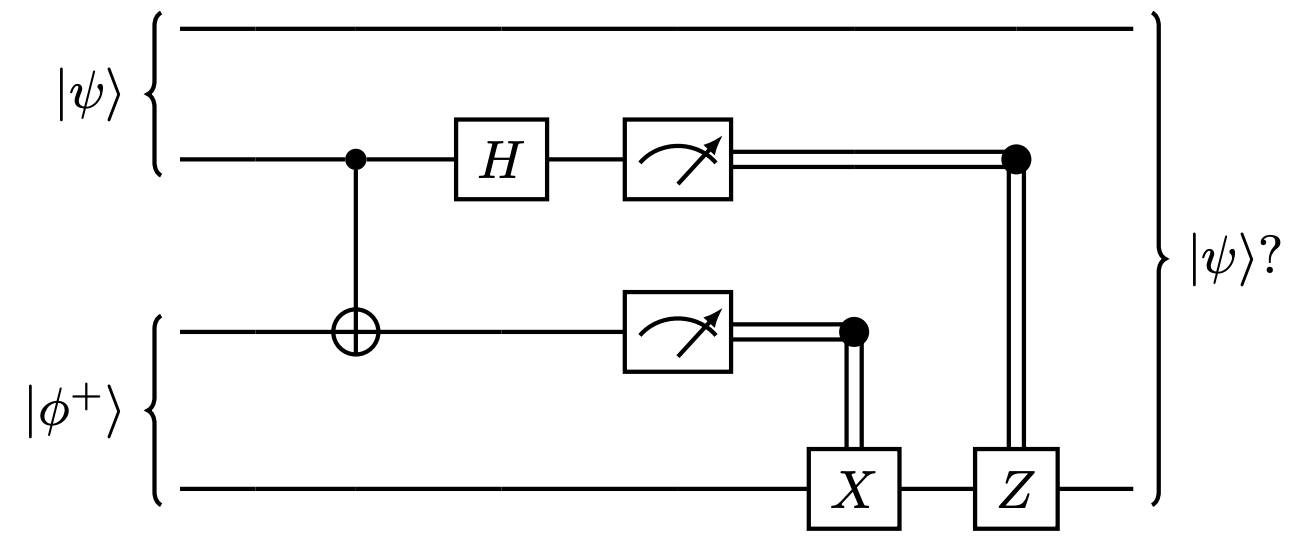
    
Puedes resolver esto como consideres (con código o con papel y boli). Puedes considerar un ejemplo concreto si así es más fácil.
</div>

In [ ]:
##### ==================================
# Escribe tu solución aquí.
Can_entanglement_be_teleported =  #Escribe True or False :D
##### ==================================

<div class="alert alert-block alert-success">
    
**Q3.13 ¿Dónde está mi par de Bell? (1pt)**

El siguiente circuito teleporta el estado entrelazado $\phi^+$ en los primeros cúbits entrelazandolo con un estado GHZ y luego haciendo varias operaciones. Encuentra en qué dos cúbits acaba el estado $\phi^+$
    
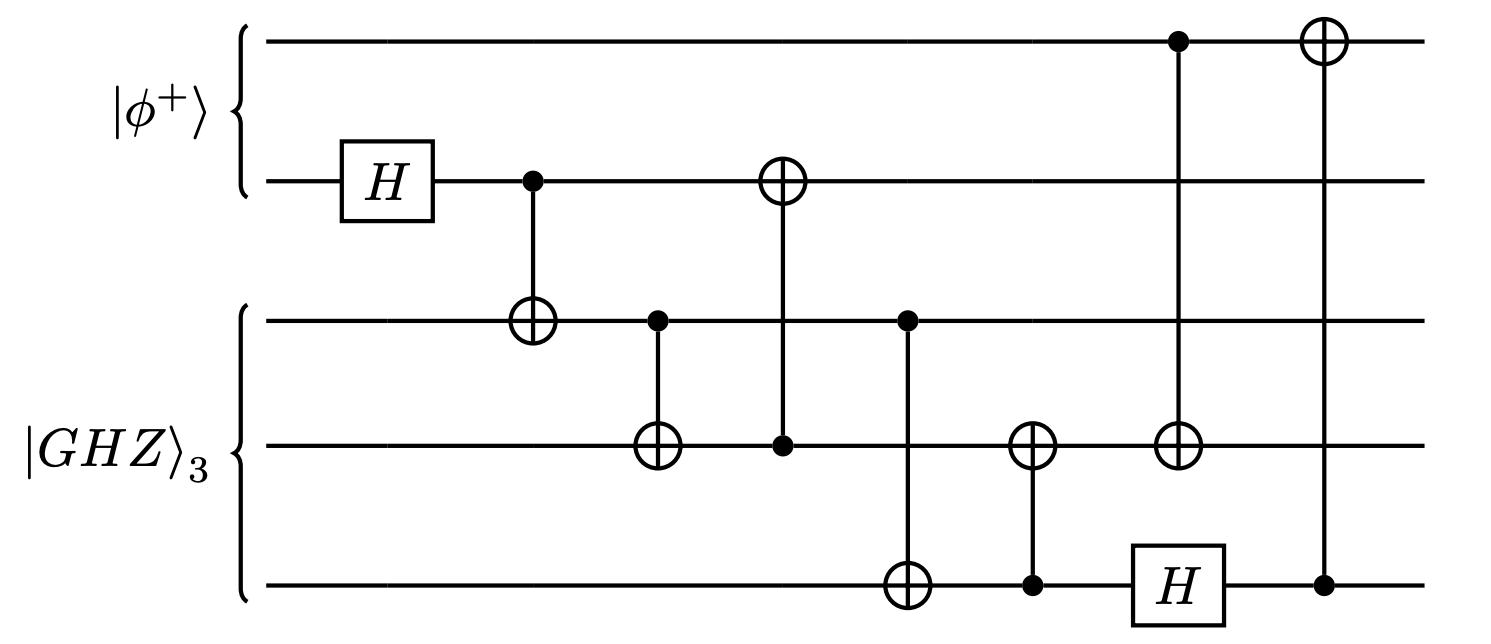
    
De nuevo, puedes resolver esto a mano, pero puede que sea más sencillo hacer el circuito en qiskit y buscar donde ha acabado el estado
</div>

In [ ]:
##### ==================================
# Escribe tu solución aquí.
Where_did_the_bell_pair_go = 'Escribe aquí'
##### ==================================

# Comunicación superlumínica

Considera una vez más el estado de Bell

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)$$

Alice quiere quiere mandar el mensaje $01110101...$ a Bob, así que comparten tantos pares de Bell como bits que quieran transmitir. Se ponen de acuerdo en que cuando Alice quiera enviar un $0$, medirá en la base $Z$, mientras que si quiere mandar un $1$, medirá en la base $X$. Haciendo esto, la función de onda colapsará instantánemanete a un autoestado de $Z$ o $X$ sin importar lo lejos que esté Bob. ¿Puede Bob recuperar el mensaje haciendo una sola medida por cada bit (es decir, sin hacer copias)?

<div class="alert alert-block alert-success">
    
**Q3.14 ¿Puede Bob recuperar el mensaje? (1pt)**

Justifica por qué este protocolo no permite a Bob recuperar el mensaje original si no puede hacer copias del estado. Además implementalo en qiskit.
</div>

ESCRIBE AQUÍ

In [ ]:
##### ==================================
# Escribe tu solución aquí.

##### ==================================

<div class="alert alert-block alert-success">

**Instrucciones de entrega**  
    
Cuando estés listo, corre la siguiente celda y manda por email tus Jupyter notebooks a meijian.li@usc.es
</div>

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table